# Sir Sly Lyrics


In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
#from nltk.book import * 

C:\Users\Danielle Ip\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
lyrics = pd.read_csv("sirsly_lyrics.csv")
lyrics.head()

,Title,Featured Artists,Album,Time,Year,Month,Day,Lyrics,Current Streams,Track Num,Music Video
0,Where I'm Going,none,You Haunt Me,3:20,2014,9,16,Ah ah ah. Ah ah ah. Ah ah ah. Ah ah ah. I was ...,2274084,1,yes
1,Ghost,none,You Haunt Me,3:37,2014,9,16,"Go ahead and stand up straight, Straight again...",8114359,2,yes
2,Gold,none,You Haunt Me,3:52,2014,9,16,"Mouth is made of metal, metal, metal. Pocket f...",10264438,3,yes
3,You Haunt Me,none,You Haunt Me,3:42,2014,9,16,"I'm selfish, never didn't think about anyone b...",5029037,4,yes
4,Found You Out,none,You Haunt Me,3:37,2014,9,16,"I'm running, Tired of this complex. I was jeal...",1722737,5,yes


In [3]:
#We perform a few simple text cleaning tasks. We convert characters to lower case, eliminate the new lines, and drop all punctuation.

lyrics['clean text'] = (
    lyrics['Lyrics']
    .str.replace("\n", " ")
    .str.lower()
    .str.replace(r"[^a-z\s]", " ")
)
lyrics.head()

,Title,Featured Artists,Album,Time,Year,Month,Day,Lyrics,Current Streams,Track Num,Music Video,clean text
0,Where I'm Going,none,You Haunt Me,3:20,2014,9,16,Ah ah ah. Ah ah ah. Ah ah ah. Ah ah ah. I was ...,2274084,1,yes,ah ah ah ah ah ah ah ah ah ah ah ah i was ...
1,Ghost,none,You Haunt Me,3:37,2014,9,16,"Go ahead and stand up straight, Straight again...",8114359,2,yes,go ahead and stand up straight straight again...
2,Gold,none,You Haunt Me,3:52,2014,9,16,"Mouth is made of metal, metal, metal. Pocket f...",10264438,3,yes,mouth is made of metal metal metal pocket f...
3,You Haunt Me,none,You Haunt Me,3:42,2014,9,16,"I'm selfish, never didn't think about anyone b...",5029037,4,yes,i m selfish never didn t think about anyone b...
4,Found You Out,none,You Haunt Me,3:37,2014,9,16,"I'm running, Tired of this complex. I was jeal...",1722737,5,yes,i m running tired of this complex i was jeal...


We can then use sklearn to create a word vector for each song, which contains the counts of all words in its lyrics. By all words, we mean the set of all unique words used across all 26 songs. We can think of each word vector as a record so we have 26 records and thousands of variables (word counts).
We can try to examine the relationship between speeches by reducing the dimensionality of the data. We take an approach that is a kind of Principle Component Analysis for word vectors. Specifically, we measure the distance between songs via a metric on the word vectors.

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
tfidf = vec.fit_transform(lyrics['clean text'])

In [5]:
np.random.seed(42)
import scipy as sp
(u, s, vt) = sp.sparse.linalg.svds(tfidf, k=2)

This gives us a 26 by 26 matrix of the distances between all pairs of speeches. Then we use SVD to decompose the matrix and plot the first two column vectors of the resulting decomposition (these are similar in nature to the first two principle components).

In [6]:
#df['Year'] = df['Date'].str[-4:].astype('int')
lyrics['x'] = u[:,0]
lyrics['y'] = u[:,1]
#lyrics.head(26)

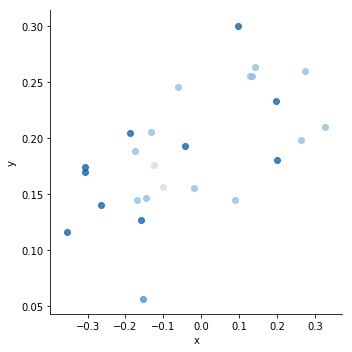

In [7]:
sns.lmplot(x = 'x', y = 'y', data = lyrics, hue='Year', legend=False, fit_reg=False, palette="Blues")

In [10]:
!pip install plotly

  Stored in directory: C:\Users\Danielle Ip\AppData\Local\pip\Cache\wheels\d7\a9\33\acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying


You are using pip version 19.0.3, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [12]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

In [13]:
colors = np.array(["rgba({0},{1},{2},1)".format(*c) for c in sns.color_palette("Blues", len(lyrics))])
colors[-1] = "rgba(.99,.5,.2,1.)"
py.iplot([go.Scatter(x = lyrics['x'], y = lyrics['y'], mode='markers', marker=dict(color=colors), text=lyrics['Title'])])

It appears that there are a few pairs of songs that have vector values close to another: 
    High & Change
    Leave You & The First Stone
    

**for changes/updates: **
    save, go to terminal. do git status. add file with git add. if its already there and updating, do git commit <file name>. vim will pop up. tap "i", enter a commit mesage. i.e. "added a period." Esc to exit out. then do :wq. that saves and quits. then type git push. 

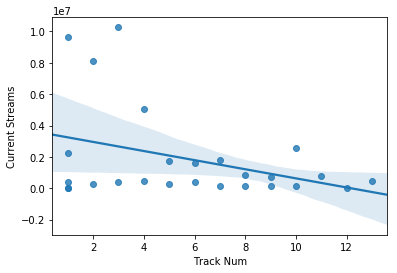

In [14]:
plt.figure()
#for_plotting = daily_counts
#for_plotting["Daily Count Casual Riders"] = for_plotting["casual"]
#for_plotting["Daily Count Registered Riders"] = for_plotting["registered"]

lyrics["Current Streams"].replace(("none"), (0), inplace=True)
lyrics["Current Streams"] = lyrics["Current Streams"].fillna(0)
lyrics["Current Streams"] = [int(lyrics["Current Streams"][i]) for i in np.arange(26)]
sns.regplot(x= "Track Num", y ="Current Streams", data=lyrics)



It appears that the higher the track number, the lower the amount of streams. This is consistent with the concept of B-side tracks-- non-title tracks are often overlooked. 

In [15]:
text_tester = [nltk.Text(nltk.word_tokenize(lyrics["Lyrics"][i])) for i in np.arange(26)]
text_tester

lyrics["text obj"] = text_tester
lyrics.head()


LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  Searched in:
    - 'C:\\Users\\Danielle Ip/nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - 'C:\\Users\\Danielle Ip\\Anaconda3\\nltk_data'
    - 'C:\\Users\\Danielle Ip\\Anaconda3\\share\\nltk_data'
    - 'C:\\Users\\Danielle Ip\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\Danielle Ip\\AppData\\Roaming\\nltk_data'
    - ''
**********************************************************************


In [16]:
num_words = [len(lyrics["text obj"][i]) for i in np.arange(26)]
lex_rich = [np.round(len(set(lyrics["text obj"][i]))/num_words[i], 2) for i in np.arange(26)]

raw_datas = {"Title": lyrics["Title"], 
            "Album": lyrics["Album"], 
            "Lyrics": lyrics["text obj"], 
            "Num Words": num_words, 
            "Lexical Richness": lex_rich}

words_table = pd.DataFrame(raw_datas)
words_table = words_table[["Title", "Album", "Lyrics", "Num Words", "Lexical Richness"]]
words_table["Album"] = words_table["Album"].fillna("none")
words_table

KeyError: 'text obj'